Some Text

In [35]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import pathlib

print(tf.__version__)

2.12.0


Describe image directory

In [36]:
data_dir = pathlib.Path("data/training/picture")
print(data_dir)

data/training/picture


Create dataset

In [37]:
batch_size = 32
img_height = 180
img_width = 180

In [38]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=321,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1798 files belonging to 2 classes.
Using 1439 files for training.


In [39]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=321,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1798 files belonging to 2 classes.
Using 359 files for validation.


In [40]:
class_names = train_ds.class_names
print(class_names)

['seed', 'sprout']


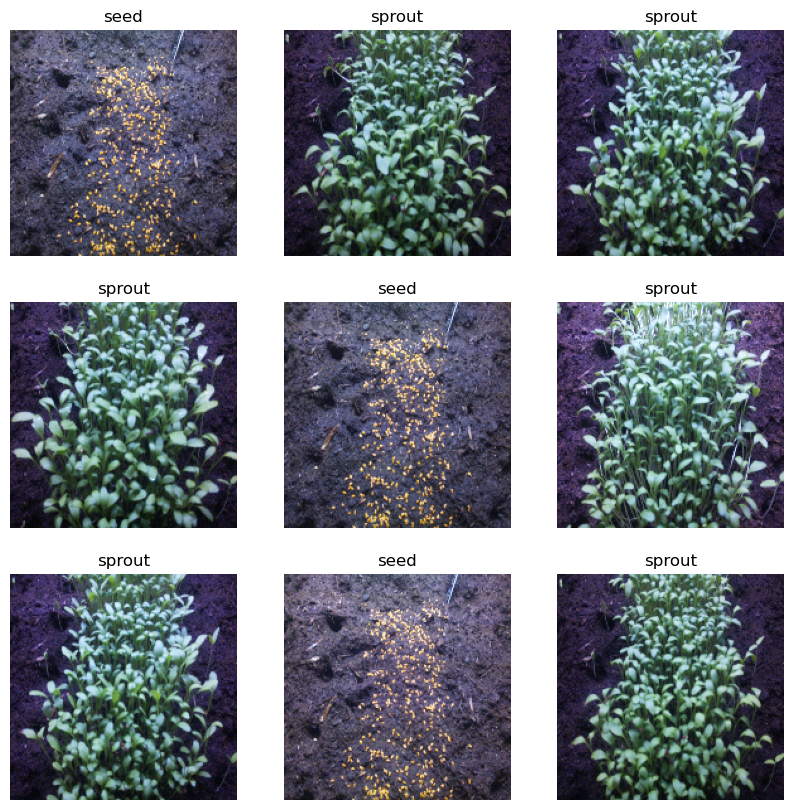

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [42]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


In [43]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [44]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [45]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [46]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
45/45 [==============================] - 11s 197ms/step - loss: 0.1561 - accuracy: 0.9368 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 2/3
45/45 [==============================] - 2s 34ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 4.4456e-04 - val_accuracy: 1.0000
Epoch 3/3
45/45 [==============================] - 1s 29ms/step - loss: 3.6221e-04 - accuracy: 1.0000 - val_loss: 1.9637e-04 - val_accuracy: 1.0000


In [47]:
import datetime

now = datetime.datetime.now()

model_dir = 'data/model/' + now.strftime("%Y-%m-%d-%H-%M-%S") + "_sprout_detect"
model.save(model_dir)

print("Model saved at " + model_dir)

INFO:tensorflow:Assets written to: data/model/2023-05-01-15-58-51_sprout_detect/assets


INFO:tensorflow:Assets written to: data/model/2023-05-01-15-58-51_sprout_detect/assets


Model saved at data/model/2023-05-01-15-58-51_sprout_detect
